### Exercise 1

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from twisted.python.util import println

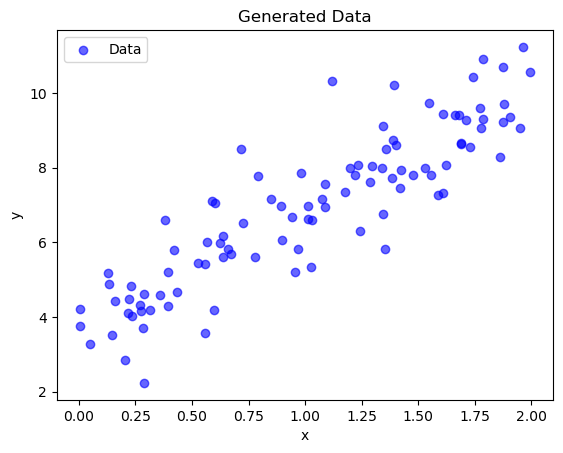

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from twisted.python.util import println

#We're generating synthetic data based on the equation y =4+3x+e where e is gaussian noise

# Parameters
sigma = 1.0  # standard deviation of noise
slope_1 = 4
slope_2 = 3

# Generate x from Uniform(0, 2)
x = np.random.uniform(0, 2, 100)

# Generate noise
noise = np.random.normal(0, sigma, 100)

# Compute y using the linear relation
y = slope_1 + slope_2 * x + noise

# Create a DataFrame for the synthetic dataset
synthetic_data = pd.DataFrame({"x": x, "y": y})


synthetic_data.head()
# Plot the generated data
plt.scatter(x, y, color='blue', alpha=0.6, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.legend()
plt.show()


In [65]:
from sklearn.linear_model import LinearRegression
#STEP 6*

# Prepare the data (x and y are from the generated dataset)
X = synthetic_data["x"].values.reshape(-1, 1)  # Reshape for sklearn
y = synthetic_data["y"].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients
w_sklearn = model.coef_[0]  # Slope
b_sklearn = model.intercept_  # Intercept




Epoch 0: w = 1.6230, b = 1.3852, MSE = 16.8652
Epoch 10: w = 3.5463, b = 3.2457, MSE = 0.9408
Epoch 20: w = 3.4599, b = 3.3610, MSE = 0.9201
Epoch 30: w = 3.3921, b = 3.4422, MSE = 0.9090
Epoch 40: w = 3.3421, b = 3.5021, MSE = 0.9030
Epoch 50: w = 3.3053, b = 3.5461, MSE = 0.8997
Epoch 60: w = 3.2782, b = 3.5786, MSE = 0.8979
Epoch 70: w = 3.2583, b = 3.6024, MSE = 0.8970
Epoch 80: w = 3.2436, b = 3.6200, MSE = 0.8964
Epoch 90: w = 3.2328, b = 3.6330, MSE = 0.8962

Epoch 0: w = 3.7382, b = 3.8630, MSE = 1.5373
Epoch 1: w = 3.7067, b = 3.9236, MSE = 1.5693
Epoch 2: w = 3.7054, b = 3.9262, MSE = 1.5708
Epoch 3: w = 3.7053, b = 3.9263, MSE = 1.5708
Epoch 4: w = 3.7053, b = 3.9263, MSE = 1.5708
Epoch 5: w = 3.7053, b = 3.9263, MSE = 1.5708
Epoch 6: w = 3.7053, b = 3.9263, MSE = 1.5708
Epoch 7: w = 3.7053, b = 3.9263, MSE = 1.5708
Epoch 8: w = 3.7053, b = 3.9263, MSE = 1.5708
Epoch 9: w = 3.7053, b = 3.9263, MSE = 1.5708
Hessian of MSE: 2.7374 (positive -> convex function)


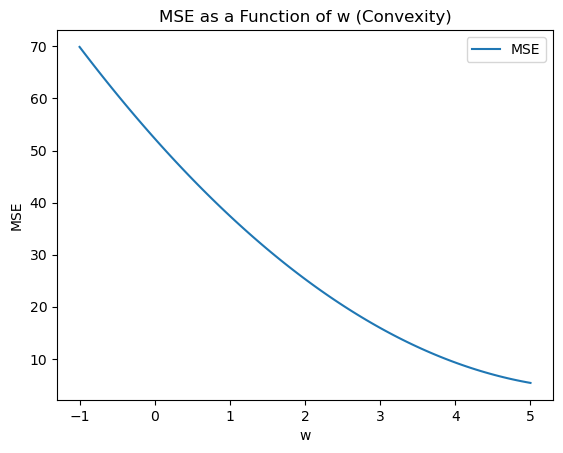

Sklearn results:
Slope (w): 3.2026376938492147
Intercept (b): 3.6690848984420312


In [66]:
from autograd import grad
import autograd.numpy as anp

# Define the MSE function
#The MSE function computes the error between predicted and actual y values.
def mse(params, x, y):
    w, b = params  # Unpack w and b
    predictions = w * x + b
    return anp.mean((y - predictions) ** 2)

# Compute the gradient of MSE with respect to params (w, b)
grad_mse = grad(mse, argnum=0)  # Gradients w.r.t. params

#Apply gradient descent
#Gradient Descent minimizes the MSE by iteratively updating w and b
learning_rate = 0.1
w = 0  # Initial guess for w
b = 0 # Initial guess for b
for epoch in range(100):
  params = anp.array([w.__float__(),b.__float__()])
  gradient = grad_mse(params, x, y)
  grad_w= gradient[0]
  grad_b =  gradient[1]
  w -= learning_rate * grad_w
  b -= learning_rate * grad_b
  if epoch % 10 == 0:
      print(f"Epoch {epoch}: w = {w:.4f}, b = {b:.4f}, MSE = {mse([w, b], x, y):.4f}")
        
gd_W = w 
gd_B = b

println()

#Apply SGD

#Unlike GD, Stochastic Gradient Descent (SGD) updates w and b for each data point instead of the entire dataset.
#This introduces randomness, which can help escape local minima but may converge more slowly or noisily
w, b = 0, 0  # Initial guesses
n = len(x)
#Each epoch processes all the data points one at a time
for epoch in range(10):
    for i in range(n):
        xi, yi = x[i], y[i]
        grad_w = -2 * xi * (yi - (w * xi + b))
        grad_b = -2 * (yi - (w * xi + b))
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
    print(f"Epoch {epoch}: w = {w:.4f}, b = {b:.4f}, MSE = {mse([w, b], x, y):.4f}")
        
#In our case the dataset is small and deterministic 
# thus once w and b reach the optimal values, SGD 
# doesn’t have much randomness left to push the parameters further

sgd_W = w
sgd_B = b

#compute hessian
hessian = 2 / len(x) * np.sum(x ** 2)
print(f"Hessian of MSE: {hessian:.4f} (positive -> convex function)")

#Convex functions have a single global minimum. 
# If an optimization algorithm finds a minimum, it's guaranteed to be the best solution.

# Plot MSE for different values of w
ws = np.linspace(-1, 5, 100)
mse_values = [mse([w, 0], x, y) for w in ws]

plt.plot(ws, mse_values, label='MSE')
plt.xlabel('w')
plt.ylabel('MSE')
plt.title('MSE as a Function of w (Convexity)')
plt.legend()
plt.show()

println("Sklearn results:")
print(f"Slope (w): {w_sklearn}")
print(f"Intercept (b): {b_sklearn}")


### Exercise 2

In [67]:
from scipy.optimize import minimize

# Exercise 1 Dataset
dataset2 = synthetic_data.copy()

#  Log-likelihood for linear regression with normally distributed errors.
#The likelihood measures how well the parameters b and w fit the observed data x and y.
def log_likelihood(beta, sigma_squared, x, y):
    n = len(y)
    residuals = y - (beta[0] + beta[1] * x)
    log_likelihood = (
        -0.5 * n * np.log(2 * np.pi)  # Constant term for normal distribution
        - 0.5 * n * np.log(sigma_squared)  # Dependent on the variance of residuals
        - (1 / (2 * sigma_squared)) * np.sum(residuals ** 2)  # Sum of squared errors
    )
    return -log_likelihood  # Negate for minimization

# Define the objective function for minimization
# The objective function wraps the log-likelihood function, ensuring the optimizer uses valid sigma_squared values.
def objective(params, x, y):
    beta = params[:2]  # First two parameters are beta (intercept and slope)
    sigma_squared = params[2]  # Third parameter is sigma_squared
    if sigma_squared <= 0:  # Avoid invalid values for sigma_squared
        return np.inf
    return log_likelihood(beta, sigma_squared, x, y)

# Initial guesses for beta and sigma_squared
initial_params = [0, 0, 1]  # [beta0, beta1, sigma_squared]

# The minimize function from scipy.optimize is used to find the parameters that maximize the likelihood
result = minimize(objective, initial_params, args=(x, y), method='L-BFGS-B', bounds=[(None, None), (None, None), (1e-6, None)])

# Extract optimized parameters
optimized_beta = result.x[:2]
optimized_sigma_squared = result.x[2]

# Display results
print(f"Optimized beta_0 (intercept): {optimized_beta[0]:.4f}")
print(f"Optimized beta_1 (slope): {optimized_beta[1]:.4f}")
print(f"Optimized sigma_squared: {optimized_sigma_squared:.4f}")
print(f"Optimized sigma (standard deviation): {np.sqrt(optimized_sigma_squared):.4f}\n\n")

# Compute differences for comparison
diff_gd = {"intercept": abs(optimized_beta[0] - gd_B), "slope": abs(optimized_beta[1] - gd_W)}
diff_sgd = {"intercept": abs(optimized_beta[0] - sgd_B), "slope": abs(optimized_beta[1] - sgd_W)}

# Display comparison
print("Comparison of MLE with Gradient Descent and SGD:\n")
print(f"Difference with GD - Intercept: {diff_gd['intercept']:.4f}, Slope: {diff_gd['slope']:.4f}")
print(f"Difference with SGD - Intercept: {diff_sgd['intercept']:.4f}, Slope: {diff_sgd['slope']:.4f}")


Optimized beta_0 (intercept): 3.6691
Optimized beta_1 (slope): 3.2026
Optimized sigma_squared: 0.8958
Optimized sigma (standard deviation): 0.9465


Comparison of MLE with Gradient Descent and SGD:

Difference with GD - Intercept: 0.0274, Slope: 0.0229
Difference with SGD - Intercept: 0.2572, Slope: 0.5027


#### Gradient Descent (GD) performs better than Stochastic Gradient Descent (SGD) in optimizing our synthetic dataset because of <br> the deterministic nature and the smaller inherent noise in our data

### Exercise 3

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numdifftools as nd
from sympy import symbols, hessian, exp

#Defining the cost function for Lasso regression
#Note: ChatGPT gave us the way to initialize this function , I thought it should be predictions = np.sum(np.dot(X, beta)) since X and b are inside a Sum function but after chatting with ChatGPT it insisted that it should be predictions = np.dot(X, beta) so I changed it to that
def lasso_loss(beta, X, y, lambda_reg):
    predictions = np.dot(X, beta)
    residuals = y - predictions
    rss = np.sum(residuals ** 2)
    l1_penalty = lambda_reg * np.sum(np.abs(beta))
    return rss + l1_penalty

# Wrapper function for nd.Hessian in order to pass X and y and be able to accept a single array input to use the Hessian function
def wrapped_lasso_loss(beta):
    lambda_reg = 0.5
    return lasso_loss(beta, X_matrix, y, lambda_reg)

# Ensuring X is in the correct shape for matrix multiplication , adding a bias term to the X matrix
X_matrix = np.column_stack((np.ones(X.shape[0]), X))


def is_positive_semidefinite(H):
    return np.all(np.linalg.eigvals(H) >= 0)
# Check convexity in a range
start, end = -10, 10
step = 1
convex = True

# Defining a range of beta values to test convexity , for example:
beta_range = np.linspace(-10, 10, 5)
convex = True

for beta_0 in beta_range:
    for beta_1 in beta_range:
        beta = np.array([beta_0, beta_1])
        H = nd.Hessian(wrapped_lasso_loss)(beta)
        if not is_positive_semidefinite(H):
            convex = False
            break
    if not convex:
        break

print("The function is convex:", convex)

The function is convex: True


### Exercise 4

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

#Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Log loss function: Measures how far predicted probabilities are from true labels
def log_loss(y_true, y_pred):
    #Add a small value (1e-15) to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true + 1e-15) * np.log(1 - y_pred + 1e-15))

#Derivatives weights and bias 
def compute_gradient(X, y, w, b):
    m = X.shape[0]  # Number of samples
    y_pred = sigmoid(np.dot(X, w) + b)  # Predicted probabilities
    # Gradient of the loss with respect to weights and bias
    dw = (1 / m) * np.sum(np.dot(X.T, (y_pred - y + 1e-15)))
    db = (1 / m) * np.sum(y_pred - y + 1e-15)
    return dw, db

#SGD for Logistic Regression
def sgd_logistic_regression(X, y, learning_rate=0.01, epochs=100, w=0, b=0, num_of_batches=100):
    np.random.seed(0)  #For reproducibility
    n_features = X.shape[1]  #Number of features in the dataset
    history = []  #To store loss at each epoch for analysis

    for epoch in range(epochs):
        #Shuffle data at the start of each epoch to ensure randomness
        indices = np.random.permutation(X.shape[0])
        X, y = X[indices], y[indices]

        for i in range(num_of_batches):  #mini batch SGD
            random_index = np.random.choice(X.shape[0])  #Pick a random sample
            xi = X[random_index:random_index + 1]  #Single data point 
            yi = y[random_index:random_index + 1]  #Corresponding label

            #Compute gradients for this data point
            dw, db = compute_gradient(xi, yi, w, b)

            #Update weights and bias using gradients
            w = w - learning_rate * dw
            b = b - learning_rate * db

        #After processing all points in the epoch, calculate the overall loss
        y_pred = sigmoid(np.dot(X, w) + b)  #Predict for all data points
        loss = log_loss(y, y_pred)          #Compute loss over the dataset

        history.append(loss)  #Store loss to analyze convergence

    return w, b, history, loss

In [70]:
#Set random seed for reproducibility
np.random.seed(42)

#Generate synthetic data
n_samples = 200  # Number of data points
X = np.random.randn(n_samples, 1)  #Random feature values (standard normal distribution)
true_w = 2  #True slope for the synthetic data
true_b = -1  #True intercept for the synthetic data

#Compute logits and convert them to probabilities
logits = true_w * X + true_b
probabilities = 1 / (1 + np.exp(-logits))

#Convert probabilities to binary labels (0 or 1) using a threshold of 0.5
y = (probabilities > 0.5).astype(int)

#Train the SGD logistic regression model
weights, bias, history, final_loss = sgd_logistic_regression(
    X, y, learning_rate=0.01, epochs=2000, w=0, b=0
)

#Print the final loss value
print(f"Final Loss: {final_loss:.6f}")

Final Loss: 0.037647


In [71]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples = 200
X = np.random.randn(n_samples, 1) 
true_w = 2 
true_b = -1

logits = true_w * X + true_b
probabilities = 1 / (1 + np.exp(-logits))
y = (probabilities > 0.5).astype(int)

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_prob = logreg.predict_proba(X_train)

loss = log_loss(y_train, y_prob)

print(f"Loss: {loss:.6f}")

Loss: 0.125946


### Exercise 5

>Hyperparameter tuning

In [72]:
#Experimenting with different learning rates, epochs, and initial guesses
learning_rates = [0.005 , 0.01 , 0.1]
epoch_values = [100, 500, 1000]
initial_guesses = [(0, 0), (10, 10), (-5, -5)]
batch_number = [100] #Number of randem samples to be used in each epoch

results = []

#Hyperparameter tuning
for w_init, b_init in initial_guesses:
    for lr in learning_rates:
        for epochs in epoch_values:
            print(f"\nLearning Rate:{lr}, Epochs:{epochs}, w_init:{w_init}, b_init:{b_init}")
            for number in batch_number:

                # Training the model
                w, b, history , test = sgd_logistic_regression(X, y, lr, epochs, w_init, b_init, number)

                print(f"    Final Loss: {test:.6f}, Batch Number: {number}")
    
                # Storing the results
                results.append({
                    "w_init": w_init,
                    "b_init": b_init,
                    "learning_rate": lr,
                    "epochs": epochs,
                    "final_loss": test,
                    "history": history,
                    "batch_number": batch_number
                })


Learning Rate:0.005, Epochs:100, w_init:0, b_init:0
    Final Loss: 0.155194, Batch Number: 100

Learning Rate:0.005, Epochs:500, w_init:0, b_init:0
    Final Loss: 0.083618, Batch Number: 100

Learning Rate:0.005, Epochs:1000, w_init:0, b_init:0
    Final Loss: 0.063434, Batch Number: 100

Learning Rate:0.01, Epochs:100, w_init:0, b_init:0
    Final Loss: 0.119013, Batch Number: 100

Learning Rate:0.01, Epochs:500, w_init:0, b_init:0
    Final Loss: 0.063342, Batch Number: 100

Learning Rate:0.01, Epochs:1000, w_init:0, b_init:0
    Final Loss: 0.048372, Batch Number: 100

Learning Rate:0.1, Epochs:100, w_init:0, b_init:0
    Final Loss: 0.047819, Batch Number: 100

Learning Rate:0.1, Epochs:500, w_init:0, b_init:0
    Final Loss: 0.027650, Batch Number: 100

Learning Rate:0.1, Epochs:1000, w_init:0, b_init:0
    Final Loss: 0.022664, Batch Number: 100

Learning Rate:0.005, Epochs:100, w_init:10, b_init:10
    Final Loss: 0.096876, Batch Number: 100

Learning Rate:0.005, Epochs:500, 

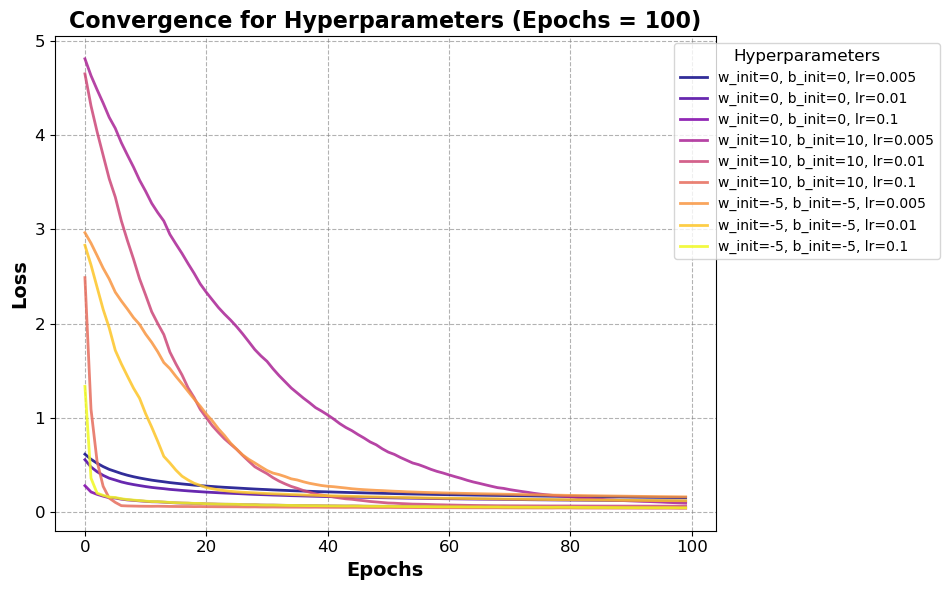

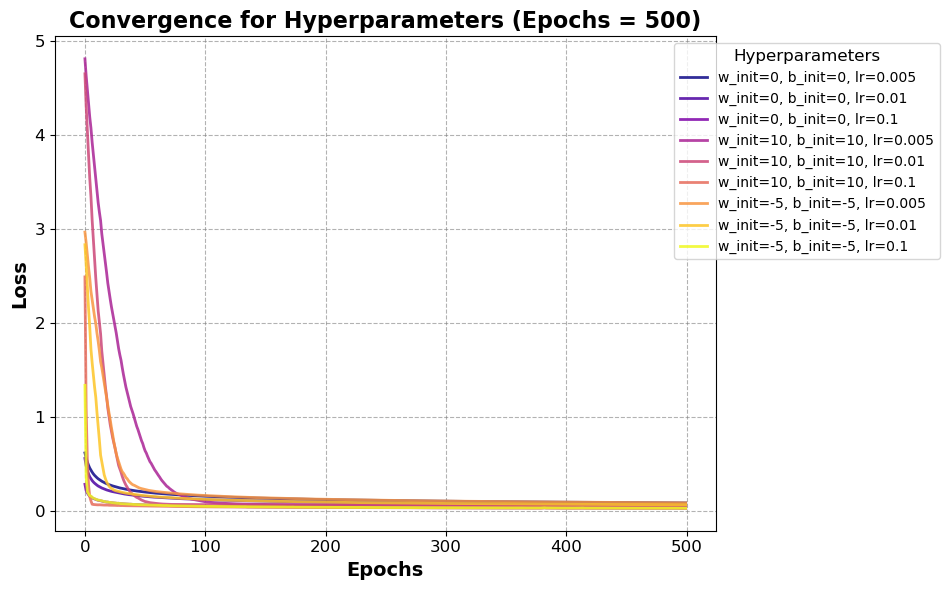

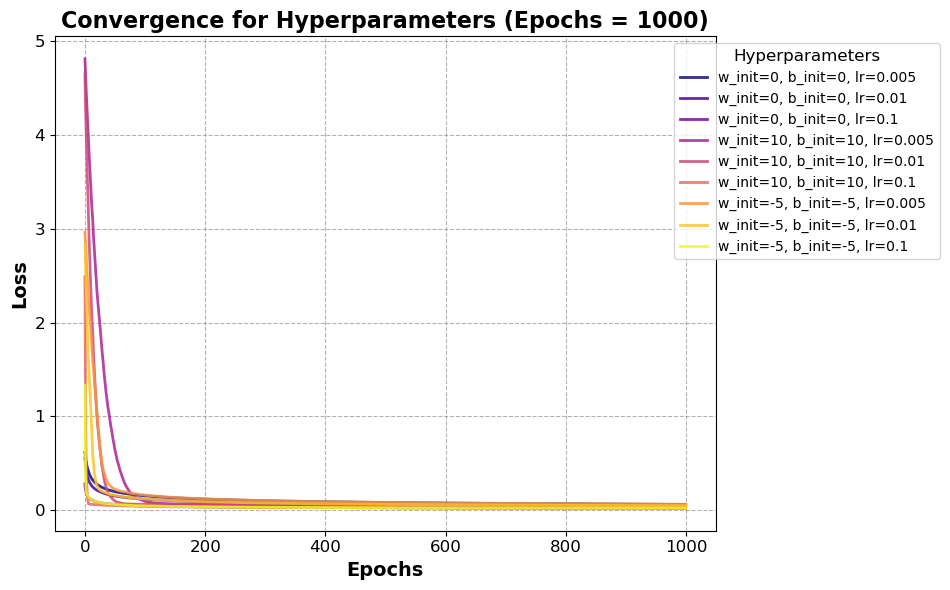

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Define unique epoch values
epoch_values = [100, 500, 1000]

# Plot for each epoch value
for epoch in epoch_values:
    # Filter results for the current epoch value
    filtered_results = [result for result in results if result["epochs"] == epoch]

    # Generate a larger figure
    plt.figure(figsize=(10, 6))

    # Use a color palette for consistent coloring
    colors = plt.cm.plasma(np.linspace(0, 1, len(filtered_results)))

    # Plot loss curves for the current epoch
    for idx, result in enumerate(filtered_results):
        plt.plot(
            result["history"],
            color=colors[idx],
            label=f"w_init={result['w_init']}, b_init={result['b_init']}, lr={result['learning_rate']}",
            linewidth=2,
            alpha=0.85,
        )

    # Add grid, labels, and title
    plt.grid(True, linestyle="--", alpha=0.6, color="gray")
    plt.xlabel("Epochs", fontsize=14, fontweight="bold")
    plt.ylabel("Loss", fontsize=14, fontweight="bold")
    plt.title(f"Convergence for Hyperparameters (Epochs = {epoch})", fontsize=16, fontweight="bold")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Customize legend
    plt.legend(
        loc="upper right", bbox_to_anchor=(1.35, 1), fontsize=10, title="Hyperparameters", title_fontsize=12
    )

    # Tight layout for clarity
    plt.tight_layout()

    # Show the plot
    plt.show()
